In [640]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### load and prepare data

In [730]:
digits = load_digits()
print(np.unique(digits.target))
data = digits.data
print(np.unique(data))
target = digits.target.reshape(data.shape[0], 1)

# scale the feature value(digits.data) between 0 to 1 instead of 0 to 16
data = data / 16

# create training & test data set
X_train, X_test, Y_train, Y_test = train_test_split(data, target, 
                                                    test_size = 0.1, random_state = 0)

"""
Dimension of input(X) and y(output) should be as follows:
X:= (features, samples). i.e. if input has 1000 samples with 64 features in each sample,
X should be arranged in (64, 1000) matrix. If input is provided in (1000, 64), 
then transpose it.

Y:= (1, samples). Similar to X, each output should be stacked column-wise.
"""
print(f'Before Transpose: X: {X_train.shape}, y: {Y_train.shape}')
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

print(f'After Transpose: X: {X_train.shape}, y: {Y_train.shape}')

"""
Currently, Y_train and Y_test are of (1, train_sample_size) and (1, test_sample_size).
However, we know that it takes a value from 0 to 9. Therefore, we would need to convert
these labels (Y's) to (10, train_sample_size) and (10, test_sample_size).

Here, each row will for the matrix will contain one 1 and rest 0, with 1 denoting the index
for the actual label value.
"""
m_train = Y_train.shape[1]
Y_train_temp = np.zeros((10, m_train))
for i in range(m_train):
    Y_train_temp[Y_train[0, i], i] = 1
Y_train = Y_train_temp
    
m_test = Y_test.shape[1]
Y_test_temp = np.zeros((10, m_test))
for i in range(m_test):
    Y_test_temp[Y_test[0, i], i] = 1
Y_test = Y_test_temp

print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')
    
# print(Y[:, 0:5])
# print(Y_train[:, 0:5])


[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Before Transpose: X: (1617, 64), y: (1617, 1)
After Transpose: X: (64, 1617), y: (1, 1617)
X_train: (64, 1617), Y_train: (10, 1617)
X_test: (64, 180), Y_test: (10, 180)


In [650]:
a = np.array([4, 1, 0, 0, 4, 3, 5])
aa = np.zeros((10, len(a)))
for i in range(len(a)):
    aa[a[i], i] = 1

### analyze data

In [651]:
"""
This method takes parameter values from 0 to 1796
"""
def print_details(sample_id):
    x = X_train[:, sample_id].reshape(8, 8)
    y = Y_train[:, sample_id]
    print(f'X: {x},\n y: {y}')
    plt.gray()
    plt.matshow(x)
    plt.show()

X: [[0.     0.     0.     0.5625 0.9375 0.125  0.     0.    ]
 [0.     0.     0.3125 1.     0.6875 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.0625 0.     0.     0.    ]
 [0.     0.125  1.     0.6875 0.     0.     0.     0.    ]
 [0.     0.125  1.     0.6875 0.25   0.25   0.     0.    ]
 [0.     0.125  0.9375 1.     1.     0.875  0.625  0.0625]
 [0.     0.     0.5625 1.     0.4375 0.1875 0.9375 0.375 ]
 [0.     0.     0.     0.4375 0.9375 1.     1.     0.375 ]],
 y: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

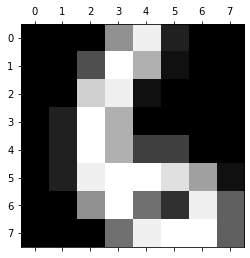

In [653]:
# print details of any sample out of the available samples
print_details(180)

### activation functions

In [654]:
"""The following activation functions are used in forward propagation."""
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

"""The following derivatives for activation functions are used back propagation."""
def sigmoid_back(dA, Z):
    S = sigmoid(Z)
    dS = S * (1 - S)
    dZ = dA * dS     # chain rule
    return dZ

def relu_back(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def softmax_back(dA, Z):
    # need to implement
    return None

### initialize weights and bias

In [659]:
"""
This method takes a list of numbers. The format of the list is as follows:
[n_x, n_h1, n_h2, ..., n_o]
where 
n_x = number of features in the input
n_h1, n_h2, ... = number of nodes in first, second, etc. hidden layers
n_o = number of output nodes.

For example:
If layers = [4, 6, 3, 1], then it has:
number of features in the input = 4
number of nodes in the first hidden layer = 6
number of nodes in the second hidden layer = 3
number of nodes in the output layer = 1
"""
def initialize_parameters(layers):
    L = len(layers)
    W = []
    b = []

    for l in range(0, L - 1):
        w_l = np.random.randn(layers[l + 1], layers[l]) * 0.01
        b_l = np.zeros((layers[l + 1], 1))
        W.append(w_l)
        b.append(b_l) 

    return W, b

In [660]:
layers = [64, 12, 8, 10]
W, b = initialize_parameters(layers)

for l in range(len(layers) - 1):
    print(f'layer {l}: W: {W[l].shape}, b: {b[l].shape}')

layer 0: W: (12, 64), b: (12, 1)
layer 1: W: (8, 12), b: (8, 1)
layer 2: W: (10, 8), b: (10, 1)


### forward propagation

In [679]:
def forward_prop(X, W, b):
    """
    We use a cache to store necessary intermediate metrics for each layers.
    In this cache, for each layer, we store the corresponding input (AL - 1), weight(WL),
    bias(bL) and linear_forward(zL).
    
    We store this intermediate metrics, because we will need these for evaulating derivates
    during back-propagation.
    """
    caches = []
    L = len(W)
    for l in range(L):
        if l == 0:
            input = X
        else:
            input = a
        z = np.dot(W[l], input) + b[l]
        if l < L - 1:
            a = relu(z)
        else:
            a = sigmoid(z)
        """
        Here we are creating a cache for the current layer
        and appending to the caches.
        """
        cache = (input, W[l], b[l], z)
        caches.append(cache)
    return a, caches

In [680]:
AL, caches = forward_prop(X_train, W, b)
print(f'Output: {AL.shape}, cache length: {len(caches)}')
print('==================')
for layer in range(3):
    il, wl, bl, zl = caches[layer]
    print(f'layer {layer}: input: {il.shape}, w: {wl.shape}, b: {bl.shape}, z: {zl.shape}')

Output: (10, 1617), cache length: 3
layer 0: input: (64, 1617), w: (12, 64), b: (12, 1), z: (12, 1617)
layer 1: input: (12, 1617), w: (8, 12), b: (8, 1), z: (8, 1617)
layer 2: input: (8, 1617), w: (10, 8), b: (10, 1), z: (10, 1617)


### cost function

In [681]:
def compute_cost(AL, Y):
    m = AL.shape[1]
    # will have to check for why the commented cost function was returning (10, 10)
#     return (-1 / m) * (np.dot(Y, np.log(AL.T)) + (np.dot(1 - Y, np.log(1 - AL.T))))
    cost = -(1 / m) * np.sum((Y * np.log(AL) + (1 - Y) * np.log(1 - AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost

In [682]:
cost = compute_cost(AL, Y_train)
cost

0.33715100679120125

### back propagation

In [683]:
def linear_back(A_prev, W, b, dZ):
    m = A_prev.shape[1]
    
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [684]:
def back_prop(AL, Y, caches):
    L = len(caches)  # number of layers
    m = AL.shape[1]
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    grads = []

    for l in reversed(range(L)):
        A_prev, W, b, Z = caches[l]
        if l == L-1:
            dZ = sigmoid_back(dAL, Z)
        else:
            dZ = relu_back(dA_prev, Z)

        dA_prev, dW, db = linear_back(A_prev, W, b, dZ)
        grad = (dA_prev, dW, db)
        """
        Because we are moving backward, we would need to store the gradient descent (GD)
        for each layers properly. That is, even if we moving from L->L-1->...->1,
        the grads (list containing GDs) in 1->...->L-1->L order.
        (This approach will help us, while updating the weight(W) and bias(b) parameters
        for next iteration.)
        
        Therefore, instead of append, I have used insert(0, grad) below.
        """
        #grads.append(grad)
        grads.insert(0, grad)
    return grads

In [685]:
grads = back_prop(AL, Y_train, caches)
L = len(grads)
for l in range(L):
    dA_prev, dW, db = grads[l]
    print(f'layer {l}: dA_prev: {dA_prev.shape}, dW: {dW.shape}, db: {db.shape}')

layer 0: dA_prev: (64, 1617), dW: (12, 64), db: (12, 1)
layer 1: dA_prev: (12, 1617), dW: (8, 12), db: (8, 1)
layer 2: dA_prev: (8, 1617), dW: (10, 8), db: (10, 1)


### update parameters

In [686]:
def update_parameters(W, b, grads, learning_rate):
    L = len(grads)
    for l in range(L):
        dA_prev, dW, db = grads[l]
        W[l] = W[l] - learning_rate * dW
        b[l] = b[l] - learning_rate * db
    return W, b

In [687]:
W, b = update_parameters(W, b, grads, 0.1)
for l in range(len(grads)):
    print(f'W: {W[l].shape}, b: {b[l].shape}')

W: (12, 64), b: (12, 1)
W: (8, 12), b: (8, 1)
W: (10, 8), b: (10, 1)


### bringing everything together

In [689]:
def L_layer_model(X, Y, layers, learning_rate = 0.0075, num_iterations = 50000):
    costs = []
    L = len(layers) - 1
    W, b = initialize_parameters(layers)
    
    for i in range(num_iterations):
        # forward propagation
        AL, caches = forward_prop(X, W, b)
        # compute cost
        cost = compute_cost(AL, Y)
        # backward propagation
        grads = back_prop(AL, Y, caches)
        # update parameters
        W, b = update_parameters(W, b, grads, learning_rate)
        
        if i % 1000 == 0:
            print(f'Cost after iteration {i}: {cost}')
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning Rate: ' + str(learning_rate))
    plt.show()
    
    return W, b

Cost after iteration 0: 6.931488694746727
Cost after iteration 1000: 3.479400424130829
Cost after iteration 2000: 3.2503121372893076
Cost after iteration 3000: 3.2501847495080343
Cost after iteration 4000: 3.2500579402410628
Cost after iteration 5000: 3.249900204944133
Cost after iteration 6000: 3.249676371316968
Cost after iteration 7000: 3.249322932575999
Cost after iteration 8000: 3.248709438627679
Cost after iteration 9000: 3.2475306831208157
Cost after iteration 10000: 3.244939613155432
Cost after iteration 11000: 3.237865647888034
Cost after iteration 12000: 3.208594116924885
Cost after iteration 13000: 3.0772756079957593
Cost after iteration 14000: 2.8807704031334147
Cost after iteration 15000: 2.7873034077570487
Cost after iteration 16000: 2.7387288357894817
Cost after iteration 17000: 2.7042446713038895
Cost after iteration 18000: 2.674529364385176
Cost after iteration 19000: 2.6468114299290093
Cost after iteration 20000: 2.6144540846868503
Cost after iteration 21000: 2.562865

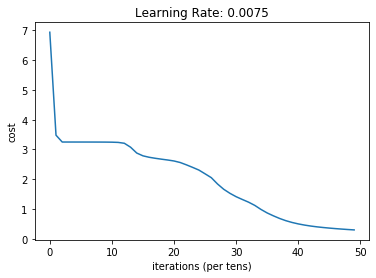

In [690]:
layers = [64, 12, 8, 10]
W, b = L_layer_model(X_train, Y_train, layers)

### predict

In [782]:
def predict_L_layer(X, W, b):
    AL, caches = forward_prop(X, W, b)
    prediction = np.argmax(AL, axis = 0)
    return prediction.reshape(1, prediction.shape[0])

def calculate_accuracy(Y_actual, Y_predicted):
    print(f'Y: {Y_actual.shape}, Predicted: {Y_predicted.shape}')
    Y_temp = np.argmax(Y_actual, axis = 0) # convert (10, m) matrix to (1, m) matrix
    Y_actual = Y_temp.reshape(1, Y_temp.shape[0])  # bring it to same dimension as Y_predicted
    return np.sum(Y_predicted == Y_actual) / Y_predicted.shape[1] * 100
    

In [784]:
predict_train = predict_L_layer(X_train, W, b)
print('-----Training Result-----')
result = calculate_accuracy(Y_train, predict_train)
print(result)
print('-----Test Result-----')
predict_test = predict_L_layer(X_test, W, b)
result = calculate_accuracy(Y_test, predict_test)
print(result)

-----Training Result-----
Y: (10, 1617), Predicted: (1, 1617)
97.1552257266543
-----Test Result-----
Y: (10, 180), Predicted: (1, 180)
93.88888888888889
